<a href="https://colab.research.google.com/github/alcarvalhox/analise_de_oleo/blob/main/Analise_Oleo_deploy_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carrega Bibliotecas**

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import pickle
from keras.models import load_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# **Carrega arquivos**

## Carrega arquivo base

In [ ]:
#analise_orig1 = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.xlsx")
#analise_orig1.to_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv")
bd = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx_pdr3.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Carrega arquivo a ser classificado

In [ ]:
arquivo_cl = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/teste_cl_original.xlsx")
arquivo_cl.to_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/teste_cl_original.csv",index = None, header=True)

In [ ]:
arquivo_cl = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/teste_cl_original.csv",sep = ',',encoding = 'utf8')

In [ ]:
arquivo_cl.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO
0,197226,907351,2018-03-17,0.178634,1.248016,0.938342,0.266653,0.766779,-0.288102,-1.037926,0.886249,-0.375626,-0.060797,-0.302044,-0.653141,0.10856,0.196979,-1.389887,-1.747278
1,198260,907351,2018-02-06,-0.364254,1.075560,0.279260,1.775803,0.994640,-0.288102,-1.037926,1.226264,-0.675402,-0.060797,-1.300375,-0.653141,0.10856,-1.607229,-1.183758,-1.881755
2,197101,907350,2018-04-29,-0.448492,0.484901,-0.206522,1.686015,0.425260,-0.288102,-1.037926,0.043996,-0.636244,-0.060797,-1.404093,-0.653141,0.10856,0.093297,-0.242928,-0.418918
3,197438,907350,2018-04-25,-0.200543,0.645804,0.130593,1.738861,0.624587,-0.288102,1.051525,0.288798,-0.675402,-0.060797,-1.018818,-0.653141,0.10856,0.391587,0.407470,0.094891
4,196549,907350,2018-02-25,-0.534263,0.484901,-0.206522,0.079027,0.739979,-0.288102,-1.037926,0.398770,-0.715059,-0.060797,-1.295257,-0.653141,0.10856,-0.014791,-0.072100,-0.640051


## Colunas a serem inseridas no arquivo a ser classificado

In [ ]:
colunas=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
        'TX_SILICIO','TX_SODIO','LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO','LIM_TBN']

valores = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
arquivo_cl = arquivo_cl.reindex(columns=arquivo_cl.columns.tolist() + colunas)   # add empty cols
arquivo_cl[colunas] = valores  # multi-column assignment works for existing cols        

In [ ]:
arquivo_cl.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN
0,197226,907351,2018-03-17,0.178634,1.248016,0.938342,0.266653,0.766779,-0.288102,-1.037926,0.886249,-0.375626,-0.060797,-0.302044,-0.653141,0.10856,0.196979,-1.389887,-1.747278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,198260,907351,2018-02-06,-0.364254,1.075560,0.279260,1.775803,0.994640,-0.288102,-1.037926,1.226264,-0.675402,-0.060797,-1.300375,-0.653141,0.10856,-1.607229,-1.183758,-1.881755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,197101,907350,2018-04-29,-0.448492,0.484901,-0.206522,1.686015,0.425260,-0.288102,-1.037926,0.043996,-0.636244,-0.060797,-1.404093,-0.653141,0.10856,0.093297,-0.242928,-0.418918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,197438,907350,2018-04-25,-0.200543,0.645804,0.130593,1.738861,0.624587,-0.288102,1.051525,0.288798,-0.675402,-0.060797,-1.018818,-0.653141,0.10856,0.391587,0.407470,0.094891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,196549,907350,2018-02-25,-0.534263,0.484901,-0.206522,0.079027,0.739979,-0.288102,-1.037926,0.398770,-0.715059,-0.060797,-1.295257,-0.653141,0.10856,-0.014791,-0.072100,-0.640051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Convertendo para o formato float

In [ ]:
#arquivo_cl[colunas] = arquivo_cl[colunas].apply(lambda x: x.int.replace(',', '.').astype('float'))
arquivo_cl['TX_ALUMINIO'] = arquivo_cl['TX_ALUMINIO'].astype(float)
arquivo_cl['TX_FERRO'] = arquivo_cl['TX_FERRO'].astype(float)
arquivo_cl['TX_CROMO'] = arquivo_cl['TX_CROMO'].astype(float)
arquivo_cl['TX_CHUMBO'] = arquivo_cl['TX_CHUMBO'].astype(float)
arquivo_cl['TX_COBRE'] = arquivo_cl['TX_COBRE'].astype(float)
arquivo_cl['TX_ESTANHO'] = arquivo_cl['TX_ESTANHO'].astype(float)
arquivo_cl['TX_PRATA'] = arquivo_cl['TX_PRATA'].astype(float)
arquivo_cl['TX_SILICIO'] = arquivo_cl['TX_SILICIO'].astype(float)
arquivo_cl['TX_SODIO'] = arquivo_cl['TX_SODIO'].astype(float)
arquivo_cl['LIM_DIESEL'] = arquivo_cl['LIM_DIESEL'].astype(float)
arquivo_cl['LIM_VISCOSIDADE'] = arquivo_cl['LIM_VISCOSIDADE'].astype(float)
arquivo_cl['LIM_AGUA'] = arquivo_cl['LIM_AGUA'].astype(float)
arquivo_cl['LIM_TBN'] = arquivo_cl['LIM_TBN'].astype(float)
arquivo_cl['LIM_FULIGEM'] = arquivo_cl['LIM_FULIGEM'].astype(float)
arquivo_cl['LIM_OXIDACAO'] = arquivo_cl['LIM_OXIDACAO'].astype(float)
arquivo_cl['LIM_SULFATACAO'] = arquivo_cl['LIM_SULFATACAO'].astype(float)

## Adicionando a coluna 'TARGET'

In [ ]:
arquivo_cl = arquivo_cl.assign(TARGET =lambda x: 'VAZIO')

In [ ]:
arquivo_cl.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,197226,907351,2018-03-17,0.178634,1.248016,0.938342,0.266653,0.766779,-0.288102,-1.037926,0.886249,-0.375626,-0.060797,-0.302044,-0.653141,0.10856,0.196979,-1.389887,-1.747278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VAZIO
1,198260,907351,2018-02-06,-0.364254,1.075560,0.279260,1.775803,0.994640,-0.288102,-1.037926,1.226264,-0.675402,-0.060797,-1.300375,-0.653141,0.10856,-1.607229,-1.183758,-1.881755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VAZIO
2,197101,907350,2018-04-29,-0.448492,0.484901,-0.206522,1.686015,0.425260,-0.288102,-1.037926,0.043996,-0.636244,-0.060797,-1.404093,-0.653141,0.10856,0.093297,-0.242928,-0.418918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VAZIO
3,197438,907350,2018-04-25,-0.200543,0.645804,0.130593,1.738861,0.624587,-0.288102,1.051525,0.288798,-0.675402,-0.060797,-1.018818,-0.653141,0.10856,0.391587,0.407470,0.094891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VAZIO
4,196549,907350,2018-02-25,-0.534263,0.484901,-0.206522,0.079027,0.739979,-0.288102,-1.037926,0.398770,-0.715059,-0.060797,-1.295257,-0.653141,0.10856,-0.014791,-0.072100,-0.640051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VAZIO


# Organizando  arquivo_cl

In [ ]:
arquivo_cl['DT_COLETA']= pd.to_datetime(arquivo_cl['DT_COLETA'])
arquivo_cl=arquivo_cl.sort_values(by=['LOCO_analise'],ignore_index=True,ascending=True)
arquivo_cl = arquivo_cl.sort_values(['LOCO_analise','DT_COLETA'],ascending=False).groupby('NU_ANLS_OLEO').head(10)

In [ ]:
arquivo_cl.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
67,13956,909040,2005-03-23,0.099137,3.185829,2.399436,2.306443,2.095843,3.581275,-1.037926,-0.963997,-1.205889,-0.060797,0.827206,1.011723,0.108560,0.264321,0.141778,0.141181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VAZIO
53,2000292946,907352,2020-12-08,-2.526123,-2.057596,-1.585440,-1.859548,-1.702728,-0.288102,-1.037926,-2.198755,-0.316922,-0.060797,-0.924824,1.874883,1.606313,-0.831715,-1.820821,-1.485238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VAZIO
52,R-97349,907352,2020-11-03,-0.457001,-2.033834,-1.339614,-1.510785,-1.508023,3.571296,0.266159,-1.869161,-0.982523,-0.060797,-0.860474,1.011723,0.108560,-0.493211,-3.157567,0.141181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VAZIO
66,2000296116,907352,2020-10-15,-1.468937,-0.766095,-1.585440,-1.162060,-1.702728,-0.288102,-1.037926,-0.635067,-0.435590,-0.060797,-0.713418,1.901120,1.567189,-1.280694,-0.983736,-0.988643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VAZIO
50,2000286917,907352,2020-09-18,0.878329,-1.494365,-1.585440,-1.859548,-0.949534,-0.288102,-1.037926,-1.614203,-0.559402,-0.060797,-0.788370,1.803927,1.600133,0.093297,-1.602212,-1.232376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VAZIO


# **Filtrando o arquivo bd**

In [ ]:
bd['DT_COLETA']= pd.to_datetime(bd['DT_COLETA'])

In [ ]:
bd=bd.sort_values(by=['LOCO_analise'],ignore_index=True,ascending=True)

In [ ]:
bd = bd.sort_values(['LOCO_analise','DT_COLETA'],ascending=False).groupby('NU_ANLS_OLEO').head(10)

In [ ]:
colunas_TX=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
         'TX_SILICIO','TX_SODIO']
colunas_FEAT=['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','PRATA',
         'SILICIO','SODIO'] 

cont = 0
anterior = 0
a = arquivo_cl.shape[0] 
arquivo_cl['LOCO_analise'] = arquivo_cl['LOCO_analise'].apply(str)

for i in range(a):
  loco = arquivo_cl['LOCO_analise'][i] 
  values=[loco]
  filtered_df = bd[bd.LOCO_analise.isin(values)]
  filtered_df['DT_COLETA']= pd.to_datetime(filtered_df['DT_COLETA'])
  
  if filtered_df.shape[0]>= 4:
    
    if loco == anterior:
      cont = cont + 1
    if loco != anterior:
      cont = 0  
    dt_menor=filtered_df.iloc[[3+cont]]['DT_COLETA'] 
    dt_maior=arquivo_cl['DT_COLETA'][i]
    oneday = pd.Timedelta(days=1)
    dias = (abs((dt_maior - dt_menor)))/oneday
    print('contador ',cont,'Loco ',loco )   

    for k in range (len(colunas_TX)):
      tx = arquivo_cl[colunas_FEAT[k]][i]-filtered_df.iloc[[3+cont]][colunas_FEAT[k]]
      arquivo_cl[colunas_TX[k]][i] = (tx/dias)

    arquivo_cl['LIM_DIESEL'][i]= arquivo_cl['DIESEL'][i]
    arquivo_cl['LIM_VISCOSIDADE'][i]= arquivo_cl['VISCOSIDADE'][i]
    arquivo_cl['LIM_AGUA'][i]= arquivo_cl['AGUA'][i]
    arquivo_cl['LIM_FULIGEM'][i]= arquivo_cl['FULIGEM'][i]
    arquivo_cl['LIM_OXIDACAO'][i]= arquivo_cl['OXIDACAO'][i]
    arquivo_cl['LIM_SULFATACAO'][i]= arquivo_cl['SULFATACAO'][i]
    arquivo_cl['LIM_TBN'][i]= arquivo_cl['TBN'][i] 

    anterior = loco

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib

contador  0 Loco  907341
contador  0 Loco  907342
contador  0 Loco  907343
contador  0 Loco  907344
contador  1 Loco  907344
contador  2 Loco  907344
contador  3 Loco  907344
contador  0 Loco  907345
contador  1 Loco  907345
contador  2 Loco  907345
contador  0 Loco  907346
contador  1 Loco  907346
contador  2 Loco  907346
contador  0 Loco  907347
contador  1 Loco  907347
contador  0 Loco  907349
contador  1 Loco  907349
contador  2 Loco  907349
contador  3 Loco  907349
contador  4 Loco  907349
contador  5 Loco  907349
contador  6 Loco  907349
contador  0 Loco  907350
contador  1 Loco  907350
contador  2 Loco  907350
contador  3 Loco  907350
contador  4 Loco  907350
contador  5 Loco  907350
contador  6 Loco  907350
contador  0 Loco  907351
contador  1 Loco  907351
contador  2 Loco  907351
contador  3 Loco  907351
contador  4 Loco  907351
contador  5 Loco  907351
contador  6 Loco  907351
contador  7 Loco  907351
contador  0 Loco  907352
contador  1 Loco  907352
contador  2 Loco  907352


In [ ]:
arquivo_cl.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
67,13956,909040,2005-03-23,0.099137,3.185829,2.399436,2.306443,2.095843,3.581275,-1.037926,-0.963997,-1.205889,-0.060797,0.827206,1.011723,0.108560,0.264321,0.141778,0.141181,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,VAZIO
53,2000292946,907352,2020-12-08,-2.526123,-2.057596,-1.585440,-1.859548,-1.702728,-0.288102,-1.037926,-2.198755,-0.316922,-0.060797,-0.924824,1.874883,1.606313,-0.831715,-1.820821,-1.485238,-5.609410e-03,-0.001318,-0.001026,-0.002305,-0.000829,-0.007542,1.298506e-18,-0.003598,0.001374,-0.060797,-0.924824,1.874883,-0.831715,-1.820821,-1.485238,1.606313,VAZIO
52,R-97349,907352,2020-11-03,-0.457001,-2.033834,-1.339614,-1.510785,-1.508023,3.571296,0.266159,-1.869161,-0.982523,-0.060797,-0.860474,1.011723,0.108560,-0.493211,-3.157567,0.141181,9.061925e-05,0.000573,-0.000167,0.000424,0.000152,0.000434,9.455147e-04,-0.001746,0.000034,-0.060797,-0.860474,1.011723,-0.493211,-3.157567,0.141181,0.108560,VAZIO
66,2000296116,907352,2020-10-15,-1.468937,-0.766095,-1.585440,-1.162060,-1.702728,-0.288102,-1.037926,-0.635067,-0.435590,-0.060797,-0.713418,1.901120,1.567189,-1.280694,-0.983736,-0.988643,6.832142e-19,-0.002205,-0.003078,-0.004104,-0.002099,-0.005953,1.024821e-18,0.000000,0.000596,-0.060797,-0.713418,1.901120,-1.280694,-0.983736,-0.988643,1.567189,VAZIO
50,2000286917,907352,2020-09-18,0.878329,-1.494365,-1.585440,-1.859548,-0.949534,-0.288102,-1.037926,-1.614203,-0.559402,-0.060797,-0.788370,1.803927,1.600133,0.093297,-1.602212,-1.232376,2.394349e-03,0.000858,-0.004209,-0.001421,0.000214,-0.010050,-8.966395e-03,-0.002977,0.000721,-0.060797,-0.788370,1.803927,0.093297,-1.602212,-1.232376,1.600133,VAZIO


In [ ]:
arquivo_cl = arquivo_cl[['NU_ANLS_OLEO','LOCO_analise','DT_COLETA','ALUMINIO','FERRO','CROMO',
                         'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
                         'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN','TARGET']]

In [ ]:
array = bd.values
#array = arquivo_cl.values
# Separando o array em componentes de input (X) e output (Y)
X_base = array[:,19:35]
Y_base = array[:,35]
y = LabelEncoder().fit_transform(Y_base)

y_label = Y_base

classes =[]
labeles=np.unique(y_label)
for v in labeles:
    classes.append('Classe '+ str(v))
print(classes)

['Classe BAIXA', 'Classe CRITICA', 'Classe MEDIA', 'Classe NORMAL']


In [ ]:
# Transformando o arquivo em array
array = arquivo_cl.values
# Separando o array em componentes de input (X) e output (Y)
K = array[:,0:3]
X = array[:,3:35]
Y = array[:,35]

colunas1 = ['NU_ANLS_OLEO','LOCO_analise','DT_COLETA']
colunas2 = ['ALUMINIO','FERRO','CROMO',
                         'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
                         'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']
                   
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)


df = pd.DataFrame(rescaledX,columns=colunas2) 
df1 = pd.DataFrame(K,columns=colunas1)
target = pd.DataFrame(Y)
df['TARGET'] = target
df = pd.concat([df1,df], axis=1)

# Transformando o arquivo em array
array = df.values
# Separando o array em componentes de input (X) e output (Y)
K1 = array[:,0:3]
X1 = array[:,3:35]
Y1 = array[:,35]

# Padronizando Média e Desvio Padrão
scaler = StandardScaler().fit(X1)
standardX = scaler.transform(X1)

df = pd.DataFrame(standardX,columns=colunas2) 
df1 = pd.DataFrame(K1,columns=colunas1)
target = pd.DataFrame(Y1)
df['TARGET'] = target
df = pd.concat([df1,df], axis=1)

pt = PowerTransformer(method = "yeo-johnson",standardize=True)
data_trans = pt.fit_transform(df[colunas2])
data_trans=pd.DataFrame(data_trans) 
data_trans.columns = colunas2 
#data_trans = data_trans.assign(padronizada['Target']) 
data_trans = data_trans.join(df['TARGET'])  
data_trans = pd.concat([df1,data_trans], axis=1) 


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
bd.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
175959,13956,909040,2005-03-23,0.099137,3.185829,2.399436,2.306443,2.095843,3.581275,-1.037926,-0.963997,-1.205889,-0.060797,0.827206,1.011723,0.108560,0.264321,0.141778,0.141181,-0.005987,0.002207,0.012396,-0.011976,0.015193,-0.011459,-0.006592,-0.001284,0.000665,-0.060797,0.827206,1.011723,0.264321,0.141778,0.141181,0.108560,NORMAL
175910,2000292946,907352,2020-12-08,-2.526123,-2.057596,-1.585440,-1.859548,-1.702728,-0.288102,-1.037926,-2.198755,-0.316922,-0.060797,-0.924824,1.874883,1.606313,-0.831715,-1.820821,-1.485238,-0.520636,-0.031211,-0.010256,-0.084438,-0.005985,-0.244569,-0.006592,-0.050236,0.004019,-0.060797,-0.924824,1.874883,-0.831715,-1.820821,-1.485238,1.606313,NORMAL
175911,R-97349,907352,2020-11-03,-0.457001,-2.033834,-1.339614,-1.510785,-1.508023,3.571296,0.266159,-1.869161,-0.982523,-0.060797,-0.860474,1.011723,0.108560,-0.493211,-3.157567,0.141181,0.049304,0.013901,0.016726,0.012731,0.012103,0.050268,-0.020807,-0.003051,0.000674,-0.060797,-0.860474,1.011723,-0.493211,-3.157567,0.141181,0.108560,NORMAL
175912,2000296116,907352,2020-10-15,-1.468937,-0.766095,-1.585440,-1.162060,-1.702728,-0.288102,-1.037926,-0.635067,-0.435590,-0.060797,-0.713418,1.901120,1.567189,-1.280694,-0.983736,-0.988643,-0.373132,0.028537,-0.085814,-0.085898,-0.038375,-0.817682,-0.274444,0.024486,0.002770,-0.060797,-0.713418,1.901120,-1.280694,-0.983736,-0.988643,1.567189,NORMAL
175908,2000286917,907352,2020-09-18,0.878329,-1.494365,-1.585440,-1.859548,-0.949534,-0.288102,-1.037926,-1.614203,-0.559402,-0.060797,-0.788370,1.803927,1.600133,0.093297,-1.602212,-1.232376,0.227177,-0.020013,-0.086977,-0.121298,0.013229,-0.754549,-0.345889,-0.072321,0.001976,-0.060797,-0.788370,1.803927,0.093297,-1.602212,-1.232376,1.600133,NORMAL


In [ ]:
#array1 = data_trans.values
array1 = arquivo_cl.values

In [ ]:
teste = array1[:,19:35]
teste[1]

array([-0.0056094098379869065, -0.0013178664303792101,
       -0.001026382515067446, -0.0023046765170750675,
       -0.0008293804147994082, -0.007541979849867958,
       1.2985064615498906e-18, -0.003597840041657631,
       0.0013738365986318308, -0.060796934350587875, -0.924823676714596,
       1.8748826295975738, -0.8317153097035223, -1.8208210854900002,
       -1.485238022216309, 1.606312529068392], dtype=object)

In [ ]:
df= data_trans[['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE',
                 'TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO','LIM_DIESEL',
                 'LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO',
                 'LIM_SULFATACAO','LIM_TBN','TARGET']]

In [ ]:
file_name = '/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/gb_4_classeskf.pkl'

In [ ]:
gb_model = pickle.load(open(file_name, "rb"))

In [ ]:
y_predict = gb_model.predict(teste[1])
y_predict

ValueError: ignored

In [ ]:
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
classes[3]

'Classe NORMAL'

In [ ]:
result = np.zeros((len(y),2))

cont = 0
for w in range(len(y)):
  result[w,0]=y[w]
  result[w,1]=y_predict[w]
  if result[w,0]==result[w,1]:
    cont = cont+1
  if y_predict == 0:  

a=(cont/len(y)* 100)
print('Quantidade de amostras: ',len(y))
print( ' Acertos: ',a,' %') 


#result

Quantidade de amostras:  68
 Acertos:  100.0  %


In [ ]:
# Pesos: NORMAL:3  BAIXA:0  MEDIA:2  CRITICA:1
y_label

array(['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'CRITICA', 'CRITICA', 'CRITICA', 'CRITICA',
       'CRITICA', 'CRITICA', 'MEDIA', 'CRITICA', 'CRITICA', 'CRITICA',
       'CRITICA', 'CRITICA', 'CRITICA', 'CRITICA', 'CRITICA', 'CRITICA',
       'CRITICA', 'BAIXA', 'BAIXA', 'MEDIA', 'BAIXA', 'BAIXA', 'BAIXA',
       'BAIXA', 'BAIXA', 'BAIXA', 'MEDIA', 'BAIXA', 'MEDIA', 'BAIXA',
       'BAIXA', 'BAIXA', 'BAIXA', 'MEDIA', 'MEDIA', 'MEDIA', 'MEDIA',
       'MEDIA', 'MEDIA', 'MEDIA', 'MEDIA', 'MEDIA', 'MEDIA', 'MEDIA',
       'MEDIA', 'MEDIA', 'MEDIA', 'MEDIA'], dtype=object)

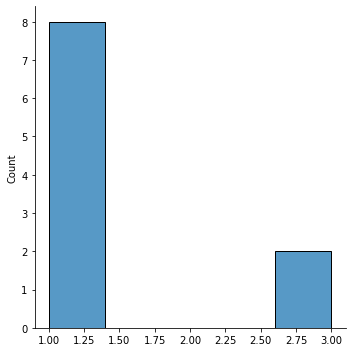

In [ ]:
sns.displot(y_predict)

In [ ]:
y_proba=gb_model.predict_proba(teste)
y_proba

array([[0.02929255, 0.00423421, 0.00391125, 0.96256199],
       [0.03249286, 0.00436281, 0.00403005, 0.95911428],
       [0.91339123, 0.03260943, 0.04338082, 0.01061851],
       [0.08563111, 0.00639714, 0.00590921, 0.90206254],
       [0.10144313, 0.0069087 , 0.00638176, 0.88526641],
       [0.02974912, 0.00423221, 0.00390941, 0.96210925],
       [0.02929255, 0.00423421, 0.00391125, 0.96256199],
       [0.03237351, 0.00422077, 0.00389884, 0.95950688],
       [0.02929255, 0.00423421, 0.00391125, 0.96256199],
       [0.91854392, 0.02759577, 0.03671107, 0.01714923],
       [0.06456348, 0.00545256, 0.00503668, 0.92494727],
       [0.03146447, 0.00422473, 0.0039025 , 0.9604083 ],
       [0.00626305, 0.04066116, 0.9487397 , 0.00433609],
       [0.02974912, 0.00423221, 0.00390941, 0.96210925],
       [0.03469732, 0.00421063, 0.00388947, 0.95720258],
       [0.04848034, 0.00574198, 0.00530403, 0.94047365],
       [0.08256908, 0.01004473, 0.00927859, 0.89810761],
       [0.02929255, 0.00423421,

In [ ]:
rn_model = load_model('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/4classesRN.hdf5')

In [ ]:
y_predict1 = rn_model.predict(teste)
y_predict1

ValueError: ignored

In [ ]:
#arquivo['TX_ALUMINIO']=0
#arquivo['TX_FERRO']=0
#arquivo['TX_CROMO']=0
#arquivo['TX_CHUMBO']=0
#arquivo['TX_COBRE']=0
#arquivo['TX_ESTANHO']=0
#arquivo['TX_PRATA']=0
#arquivo['TX_SILICIO']=0
#arquivo['TX_SODIO']=0
#arquivo['LIM_DIESEL']=0
#arquivo['LIM_VISCOSIDADE']=0
#arquivo['LIM_AGUA']=0
#arquivo['LIM_TBN']=0
#arquivo['LIM_FULIGEM']=0
#arquivo['LIM_OXIDACAO']=0
#arquivo['LIM_SULFATACAO']=0

In [ ]:
#arquivo = arquivo.iloc[101000:101020]

In [ ]:
#arquivo['TX_ALUMINIO'] = arquivo['TX_ALUMINIO'].astype(float)
#arquivo['TX_FERRO'] = arquivo['TX_FERRO'].astype(float)
#arquivo['TX_CROMO'] = arquivo['TX_CROMO'].astype(float)
#arquivo['TX_CHUMBO'] = arquivo['TX_CHUMBO'].astype(float)
#arquivo['TX_COBRE'] = arquivo['TX_COBRE'].astype(float)
#arquivo['TX_ESTANHO'] = arquivo['TX_ESTANHO'].astype(float)
#arquivo['TX_PRATA'] = arquivo['TX_PRATA'].astype(float)
#arquivo['TX_SILICIO'] = arquivo['TX_SILICIO'].astype(float)
#arquivo['TX_SODIO'] = arquivo['TX_SODIO'].astype(float)
#arquivo['LIM_DIESEL'] = arquivo['LIM_DIESEL'].astype(float)
#arquivo['LIM_VISCOSIDADE'] = arquivo['LIM_VISCOSIDADE'].astype(float)
#arquivo['LIM_AGUA'] = arquivo['LIM_AGUA'].astype(float)
#arquivo['LIM_TBN'] = arquivo['LIM_TBN'].astype(float)
#arquivo['LIM_FULIGEM'] = arquivo['LIM_FULIGEM'].astype(float)
#arquivo['LIM_OXIDACAO'] = arquivo['LIM_OXIDACAO'].astype(float)
#arquivo['LIM_SULFATACAO'] = arquivo['LIM_SULFATACAO'].astype(float)

In [ ]:
a=arquivo['LOCO_analise'].unique()
len(a)

80